In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Data load and exploring

In [ ]:
data = pd.read_csv("Data.TR_BIG_formated.csv")
data.shape

(643, 72)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 72 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Column1                                             643 non-null    int64  
 1   ACHATS                                              643 non-null    float64
 2   AJUSTAGE                                            643 non-null    float64
 3   CN                                                  643 non-null    float64
 4   ETUDES                                              643 non-null    float64
 5   METHODES                                            643 non-null    float64
 6   MOULE.CLEF.EN.MAIN1                                 643 non-null    float64
 7   ST                                                  643 non-null    float64
 8   Total_price                                         643 non-null    float64
 9  

In [ ]:
# Drop unknown columns
data_dropped = data.drop(columns=['N1', 'N3', "N10", "N12", "N18", "unique_value_ID", "Column1", "id", "V_D_Date"])
# data_dropped = data_dropped.rename(columns={"Column1": "id"})
data_dropped.shape

(643, 63)

In [ ]:
# Make data categorical
data_dropped['Cavity.retainer'] = data_dropped['Cavity.retainer'].astype('category')
data_dropped['Acier.moulant_APIA'] = data_dropped['Acier.moulant_APIA'].astype('category')
data_dropped['Regulation_APIA'] = data_dropped['Regulation_APIA'].astype('category')
data_dropped['Commande.Ejection_APIA'] = data_dropped['Commande.Ejection_APIA'].astype('category')
data_dropped['Ejection_APIA'] = data_dropped['Ejection_APIA'].astype('category')
data_dropped['Type.Injection_APIA'] = data_dropped['Type.Injection_APIA'].astype('category')
data_dropped['Plastic_Part_APIA'] = data_dropped['Plastic_Part_APIA'].astype('category')
data_dropped[cat_columns] = data_dropped[cat_columns].apply(lambda x: x.cat.codes)

In [ ]:
cat_columns = data_dropped.select_dtypes(['category']).columns
cat_columns

Index([], dtype='object')

In [ ]:
data_dropped[cat_columns] = data_dropped[cat_columns].apply(lambda x: x.cat.codes)

In [ ]:
data_dropped.head()

,ACHATS,AJUSTAGE,CN,ETUDES,METHODES,MOULE.CLEF.EN.MAIN1,ST,Total_price,Mold_Volume_A4,Number_of_cavities_A22,...,Normal,Water.pressurized,Nbre_total_point,Cavity.retainer,Acier.moulant_APIA,Regulation_APIA,Commande.Ejection_APIA,Ejection_APIA,Type.Injection_APIA,Plastic_Part_APIA
0,1.083460e+14,2.733000e+13,7.722970e+14,2.953060e+14,2.010850e+14,3.435610e+14,1.685290e+13,1.679170e+14,4.547490e+14,0.000000e+00,...,0,1,1,0,2,0,1,0,0,7
1,2.707250e+14,2.688490e+14,2.189230e+14,1.295560e+14,9.933680e+14,2.997990e+14,2.531870e+14,2.574390e+14,9.643560e+14,9.677420e+14,...,0,1,1,0,2,0,0,1,0,2
2,3.200530e+14,3.615140e+14,1.252370e+13,5.052080e+14,2.229420e+14,4.748490e+14,3.272880e+14,3.531690e+14,1.228690e+14,3.225810e+13,...,0,1,3,0,1,1,0,1,0,2
3,1.769320e+14,1.549020e+14,4.696400e+14,2.247190e+13,8.087130e+13,2.122740e+14,1.044490e+14,1.223800e+14,5.368660e+14,9.677420e+14,...,0,1,1,0,2,1,1,0,0,3
4,7.742700e+14,2.593660e+14,1.030050e+14,2.693950e+14,1.792280e+14,2.997990e+14,2.056780e+14,1.756790e+14,8.533880e+14,0.000000e+00,...,1,1,1,0,2,1,1,0,1,7


In [ ]:
data_dropped.describe()

In [ ]:
data_dropped= data_dropped[data_dropped['Total_price'] != 0]
data_dropped= data_dropped[data_dropped['Mold_Volume_A4'] != 0]

In [ ]:
data_dropped.shape

(593, 63)

# 2. ML Models

R² score: 0.32526437325932867
MAE: 130332302502325.58


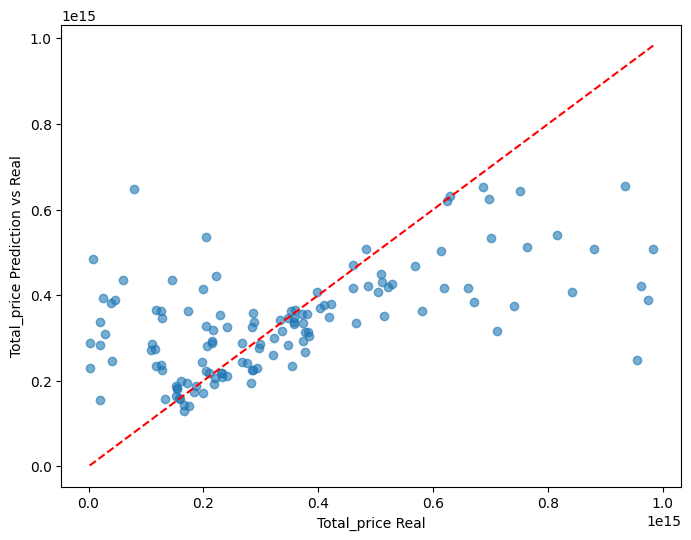

In [ ]:
y = data['Total_price']
X = data[['ACHATS', 'AJUSTAGE', 'CN', 'ETUDES', 'METHODES', 'MOULE.CLEF.EN.MAIN1', 'ST', 'Mold_Volume_A4']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("R² score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Total_price Real")
plt.ylabel("Total_price Prediction vs Real")
plt.show()

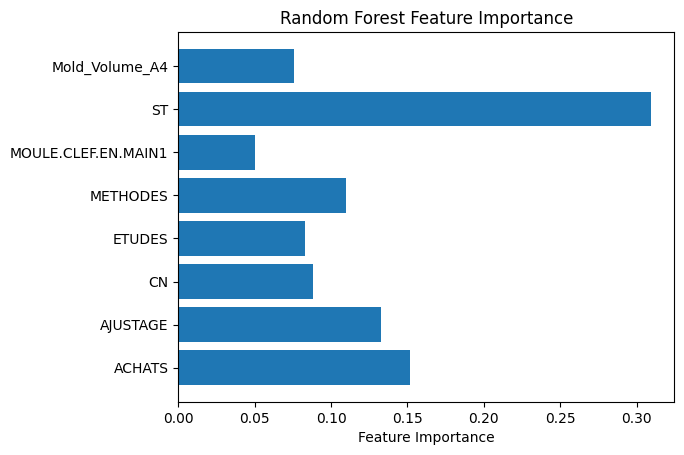

In [ ]:
importances = model.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

R² score: 0.2079358823390719
MAE: 151545639216329.3


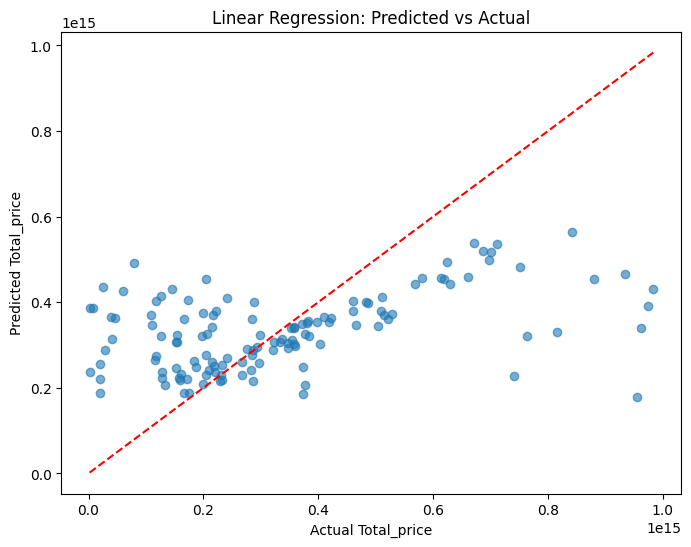

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

# Define X and y
y = data['Total_price']
X = data[['ACHATS', 'AJUSTAGE', 'CN', 'ETUDES', 'METHODES', 'MOULE.CLEF.EN.MAIN1', 'ST', 'Mold_Volume_A4']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
print("R² score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

# Plot predictions vs actual values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Total_price")
plt.ylabel("Predicted Total_price")
plt.title("Linear Regression: Predicted vs Actual")
plt.show()

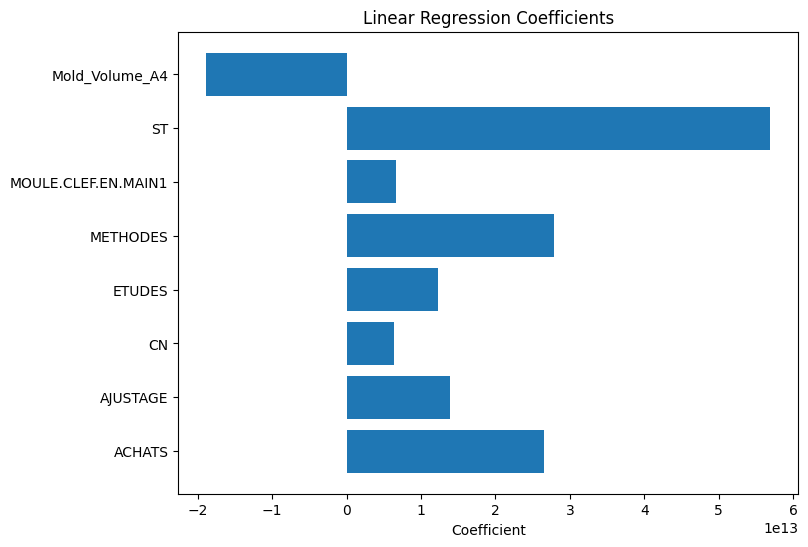

In [ ]:
# Get Linear Regression model coefficients
coefficients = model.coef_
features = X.columns

# Plot coefficients
plt.figure(figsize=(8,6))
plt.barh(features, coefficients)
plt.xlabel("Coefficient")
plt.title("Linear Regression Coefficients")
plt.show()


In [ ]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

MAE: 165696237311995.8
MSE: 6.084744118042004e+28
R²: -0.24005056427056481


In [ ]:
print(y.describe())
print(y.head())


count    5.930000e+02
mean     3.327026e+14
std      2.231731e+14
min      1.875810e+12
25%      1.733510e+14
50%      2.858990e+14
75%      4.540750e+14
max      9.987060e+14
Name: Total_price, dtype: float64
0    1.679170e+14
1    2.574390e+14
2    3.531690e+14
3    1.223800e+14
4    1.756790e+14
Name: Total_price, dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(y)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("R² score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

# 3* Reducing number of variables

In [ ]:
data_dropped_more = data_dropped.iloc[:, 1:9]

In [ ]:
data_dropped_more.head()

In [ ]:
y = data_dropped_more['Total_price']
X = data_dropped_more.drop(columns=['Total_price'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
params_rf = {
    'n_estimators': range(10, 200, 20)
}

optimizer_rf = GridSearchCV(estimator = rf, param_grid = params_rf, scoring = 'accuracy', cv = 3)
optimizer_rf_fit = optimizer_rf.fit(X_train, y_train)

In [ ]:
best_rf = optimizer_rf_fit.best_estimator_
print(best_rf)
print("Mean accuracy of the best model :", optimizer_rf_fit.best_score_)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("R² score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))